# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [4]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea" 
icon_path = "%s.png" % icon

### 데이터 입력

In [6]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("제 1차 추가경정예산안에 대한 문재인 대통령의 시정연설.txt", 'r', encoding='euc-kr')
message_of_moon = f.read()
print(message_of_moon)
f.close()

존경하는 국민 여러분, 정세균 국회의장님과 국회의원 여러분! 

지난 4월 6일, 정부는 3조 9천억원 규모의 추가경정예산안을 국회에 제출했습니다.

오늘은 국민과 국회의원 여러분께 주요 국정현안과 함께, 추가경정예산안 편성의 이유와 내용을 설명해 드리고, 여러분의 이해와 협조를 구하고자 합니다. 

우리는 지난 겨울 평창에서 역사상 가장 성공적이고 감동적인 동계올림픽과 패럴림픽을 주최했습니다.

특히 북한의 참가와 여자 아이스하키의 남북한 단일팀 출전은 한반도의 해빙을 시동하며, 남북정상회담과 북미정상회담의 개최합의로까지 이어졌습니다. 

평창의 겨울이 한반도의 봄을 이끈 것입니다. 

4월 27일 판문점에서는 세계의 이목이 집중된 가운데 남북정상회담이 성공적으로 열렸습니다.

남북정상은 ‘판문점 선언’을 통해 한반도에 새로운 평화의 시대가 열리고 있음을 온 겨레와 세계에 천명하면서, 완전한 비핵화를 통해 핵 없는 한반도를 실현하기로 합의했습니다.

또한, 일체의 적대행위를 중지하면서 올해에 종전을 선언하고, 정전협정을 평화협정으로 전환하는 등 한반도 평화체제 구축을 위해 협력하기로 했습니다. 

아울러, 개성에 남북공동연락사무소를 설치하고, 광복절을 전후해 이산가족상봉을 실현하는 등 다방면에서 협력과 교류를 활성화해 나가기로 했습니다. 

미국, 중국, 일본, 러시아를 비롯한 국제사회는 남북정상회담의 성과를 높이 평가하고, 이를 지지했습니다. 

이제 6월12일의 북미정상회담에 대한 세계의 관심과 기대가 높아지고 있습니다.

이를 위한 중요한 디딤돌이 될 한미정상회담이 22일로 예정돼 있습니다.

남북정상회담, 한미정상회담, 북미정상회담으로 이어지는 일련의 고위회담을 통해 민족 공멸의 불씨를 없애고 평화와 공영의 터전을 다지도록 혼신으로 노력하겠습니다. 

그렇게 되도록 국민 여러분께서 마음을 모아주시고, 의원 여러분께서도 당파를 넘어 도와주실 것을 부탁드립니다. 

존경하는 국민 여러분, 국회의원 여러분, 

이처럼 거대한 변화는 남북관계와 국제기류에만 

In [4]:
# 연설문2
# 아래 speech.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("KoreaSummit_Kim.txt", 'r', encoding='euc-kr')
message_of_kim = f.read()
print(message_of_kim)
f.close()

친애하는 여러분 북과 남, 해외의 동포 형제 자매들. 오늘 저와 문재인 대통령은 분열의 비극과 통일의 열망이 응결되어 있는 이곳 판문점에서 역사적인 책임감과 사명감을 안고 첫 회담을 가지었습니다. 

나는 먼저 수뇌상봉과 회담의 성공적인 개최를 위하여 많은 노고를 바치신 문재인 대통령과 남측 관계자 여러분들께 깊은 사의를 표합니다.

또한 우리들을 위해 온갖 정성과 노력을 다 기울이며 성대히 맞이하여 주고 한 혈육, 한 형제, 한민족의 따뜻한 정을 다해준 남녘 동포들에게 감사의 인사를 드립니다.

북과 남이 오늘 이렇게 다시 두 손을 맞잡기까지 참으로 긴 시간이 흘렀고 우리 모두는 너무 오랫동안 이 만남을 한마음으로 기다려왔습니다.

정작 마주 서고 보니 북과 남은 역시 서로 갈라져 살 수 없는 한 혈육이며 그 어느 이웃에도 비길 수 없는 동족이라는 것을 가슴 뭉클하게 절감하게 되었습니다.

이토록 지척에 살고 있는 우리는 대결하여 싸워야 할 이(異)민족이 아니라 단합하여 화목하게 살아야 할 한 핏줄을 이룬 한민족입니다.

하루빨리 온 겨레가 마음 놓고 평화롭게 잘 살아갈 길을 열고 우리 민족의 새로운 미래를 개척해 나갈 결심을 안고 나는 오늘 판문점 분리선을 넘어 여기에 왔습니다.

저와 문재인 대통령은 우리의 상봉을 간절히 바라고 열렬히 지지 성원 하여준 북과 남 온 겨레의 성원과 기대를 무겁게 받아들이고 북남 인민들이 절실히 바라는 문제 해결을 위해 많은 의제들을 진지하게 논의하였습니다.

무엇보다도 온 겨레가 전쟁 없는 평화로운 땅에서 번영과 행복을 누리는 새 시대를 열어나갈 확고한 의지를 같이하고 이를 위한 실천적 대책들을 합의하였습니다.

그리고 이미 채택된 북남 선언들과 모든 합의들을 철저히 이행해 나가는 것으로 관계 개선과 발전의 전환적 국면을 열어나가기로 하였습니다. 

저와 문재인 대통령은 방금 오늘 회담에서 합의된 의제들과 그 구체적 조치들을 반영한 조선반도의 평화와 번영, 통일을 위한 판문점 선언을 채택하고 서명하였습니다.

우리가 오늘 

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [7]:
# 연설문 1번 전처리
message_of_moon = message_of_moon.split('\n\n')
message_of_moon

['존경하는 국민 여러분, 정세균 국회의장님과 국회의원 여러분! ',
 '지난 4월 6일, 정부는 3조 9천억원 규모의 추가경정예산안을 국회에 제출했습니다.',
 '오늘은 국민과 국회의원 여러분께 주요 국정현안과 함께, 추가경정예산안 편성의 이유와 내용을 설명해 드리고, 여러분의 이해와 협조를 구하고자 합니다. ',
 '우리는 지난 겨울 평창에서 역사상 가장 성공적이고 감동적인 동계올림픽과 패럴림픽을 주최했습니다.',
 '특히 북한의 참가와 여자 아이스하키의 남북한 단일팀 출전은 한반도의 해빙을 시동하며, 남북정상회담과 북미정상회담의 개최합의로까지 이어졌습니다. ',
 '평창의 겨울이 한반도의 봄을 이끈 것입니다. ',
 '4월 27일 판문점에서는 세계의 이목이 집중된 가운데 남북정상회담이 성공적으로 열렸습니다.',
 '남북정상은 ‘판문점 선언’을 통해 한반도에 새로운 평화의 시대가 열리고 있음을 온 겨레와 세계에 천명하면서, 완전한 비핵화를 통해 핵 없는 한반도를 실현하기로 합의했습니다.',
 '또한, 일체의 적대행위를 중지하면서 올해에 종전을 선언하고, 정전협정을 평화협정으로 전환하는 등 한반도 평화체제 구축을 위해 협력하기로 했습니다. ',
 '아울러, 개성에 남북공동연락사무소를 설치하고, 광복절을 전후해 이산가족상봉을 실현하는 등 다방면에서 협력과 교류를 활성화해 나가기로 했습니다. ',
 '미국, 중국, 일본, 러시아를 비롯한 국제사회는 남북정상회담의 성과를 높이 평가하고, 이를 지지했습니다. ',
 '이제 6월12일의 북미정상회담에 대한 세계의 관심과 기대가 높아지고 있습니다.',
 '이를 위한 중요한 디딤돌이 될 한미정상회담이 22일로 예정돼 있습니다.',
 '남북정상회담, 한미정상회담, 북미정상회담으로 이어지는 일련의 고위회담을 통해 민족 공멸의 불씨를 없애고 평화와 공영의 터전을 다지도록 혼신으로 노력하겠습니다. ',
 '그렇게 되도록 국민 여러분께서 마음을 모아주시고, 의원 여러분께서도 당파를 넘어 도와주실 것을 부탁드립니다. ',
 '존경하

In [6]:
# 연설문 2번 전처리
message_of_kim = message_of_kim.split('\n\n')
message_of_kim

['친애하는 여러분 북과 남, 해외의 동포 형제 자매들. 오늘 저와 문재인 대통령은 분열의 비극과 통일의 열망이 응결되어 있는 이곳 판문점에서 역사적인 책임감과 사명감을 안고 첫 회담을 가지었습니다. ',
 '나는 먼저 수뇌상봉과 회담의 성공적인 개최를 위하여 많은 노고를 바치신 문재인 대통령과 남측 관계자 여러분들께 깊은 사의를 표합니다.',
 '또한 우리들을 위해 온갖 정성과 노력을 다 기울이며 성대히 맞이하여 주고 한 혈육, 한 형제, 한민족의 따뜻한 정을 다해준 남녘 동포들에게 감사의 인사를 드립니다.',
 '북과 남이 오늘 이렇게 다시 두 손을 맞잡기까지 참으로 긴 시간이 흘렀고 우리 모두는 너무 오랫동안 이 만남을 한마음으로 기다려왔습니다.',
 '정작 마주 서고 보니 북과 남은 역시 서로 갈라져 살 수 없는 한 혈육이며 그 어느 이웃에도 비길 수 없는 동족이라는 것을 가슴 뭉클하게 절감하게 되었습니다.',
 '이토록 지척에 살고 있는 우리는 대결하여 싸워야 할 이(異)민족이 아니라 단합하여 화목하게 살아야 할 한 핏줄을 이룬 한민족입니다.',
 '하루빨리 온 겨레가 마음 놓고 평화롭게 잘 살아갈 길을 열고 우리 민족의 새로운 미래를 개척해 나갈 결심을 안고 나는 오늘 판문점 분리선을 넘어 여기에 왔습니다.',
 '저와 문재인 대통령은 우리의 상봉을 간절히 바라고 열렬히 지지 성원 하여준 북과 남 온 겨레의 성원과 기대를 무겁게 받아들이고 북남 인민들이 절실히 바라는 문제 해결을 위해 많은 의제들을 진지하게 논의하였습니다.',
 '무엇보다도 온 겨레가 전쟁 없는 평화로운 땅에서 번영과 행복을 누리는 새 시대를 열어나갈 확고한 의지를 같이하고 이를 위한 실천적 대책들을 합의하였습니다.',
 '그리고 이미 채택된 북남 선언들과 모든 합의들을 철저히 이행해 나가는 것으로 관계 개선과 발전의 전환적 국면을 열어나가기로 하였습니다. ',
 '저와 문재인 대통령은 방금 오늘 회담에서 합의된 의제들과 그 구체적 조치들을 반영한 조선반도의 평화와 번영, 통일을 위

In [8]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_moon)
tf_bow1 = tf_vectorizer.fit_transform(message_of_moon)
tf_bow1

<118x1119 sparse matrix of type '<class 'numpy.int64'>'
	with 1404 stored elements in Compressed Sparse Row format>

In [13]:
# 연설문 2번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus2 = tf_vectorizer.fit(message_of_kim)
tf_bow2 = tf_vectorizer.fit_transform(message_of_kim)
tf_bow2

<24x392 sparse matrix of type '<class 'numpy.int64'>'
	with 481 stored elements in Compressed Sparse Row format>

In [9]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

1119
1119


['10년',
 '10년간',
 '10만명',
 '11',
 '11만',
 '125만',
 '12년',
 '14',
 '14만명',
 '14일',
 '18만',
 '192만명의',
 '1년',
 '1년이',
 '1명이',
 '1억원의',
 '1인당',
 '1조원',
 '1조원도',
 '1천5백개의',
 '1천5백억원',
 '1천80만원을',
 '1천억원과',
 '1천억원을',
 '1학년을',
 '2000년',
 '2016년에는',
 '2017년도',
 '2021년까지',
 '2021년에는',
 '20억원까지',
 '20여',
 '22만명의',
 '22일로',
 '24',
 '25세부터',
 '27일',
 '29세까지의',
 '2년',
 '2년간은',
 '2년간의',
 '2단계',
 '2만',
 '2만4천명의',
 '2배',
 '2조6천억',
 '2조9천억원',
 '2조9천억원은',
 '2천4백만원을',
 '2천5백억원의',
 '2천5백여명이',
 '2천만원으로',
 '2천만원의',
 '2천명으로',
 '320만원을',
 '328만명이었으나',
 '34',
 '367만명으로',
 '39만명이나',
 '3년',
 '3년간',
 '3만',
 '3월',
 '3조',
 '3조9천억원',
 '3조원과',
 '3천개',
 '3천만원까지',
 '3천만원의',
 '3천억원을',
 '4년이',
 '4만명이',
 '4명',
 '4백만원씩의',
 '4월',
 '4월까지의',
 '55',
 '56만의',
 '5개',
 '5년간',
 '5월',
 '5조원',
 '60',
 '66',
 '6만원에서',
 '6월12일의',
 '6일',
 '6천명을',
 '7만원으로',
 '7천명으로',
 '8개',
 '90',
 '9백만원을',
 '9천억원',
 'kdi의',
 '가능성',
 '가동중단에',
 '가로막습니다',
 '가운데',
 '가장',
 '가지',
 '가지의',
 '각오로',
 '감동적인',
 '감면하겠습니다',
 '감사합니다',
 '강화하고',
 '갖추고',
 '같은',
 '개개인의'

In [15]:
# 연설문 2
# check vocabulary in TDM
print(len(tf_corpus2.vocabulary_))
print(len(tf_corpus2.get_feature_names()))
tf_vectorizer.get_feature_names()

392
392


['가속화될',
 '가슴',
 '가운데',
 '가지고',
 '가지었습니다',
 '가진',
 '간절한',
 '간절히',
 '갈라져',
 '감사의',
 '감사합니다',
 '같이하고',
 '개선과',
 '개척해',
 '개최를',
 '것으로',
 '것을',
 '것이며',
 '것입니다',
 '겨레가',
 '겨레의',
 '격려를',
 '결과를',
 '결실을',
 '결실이',
 '결심을',
 '계시는',
 '고통이',
 '관계',
 '관계자',
 '관심과',
 '구체적',
 '국면을',
 '굳은',
 '그리고',
 '그의',
 '기다려왔습니다',
 '기다리는',
 '기대를',
 '기대에',
 '기록되지',
 '기쁨을',
 '기울이며',
 '기자',
 '기초하여',
 '긴밀히',
 '길로',
 '길에는',
 '길을',
 '깊은',
 '꿈과',
 '끝까지',
 '끝없는',
 '나가는',
 '나가면',
 '나가야',
 '나간다면',
 '나갈',
 '나는',
 '나아갑시다',
 '날들을',
 '남녘',
 '남은',
 '남의',
 '남이',
 '남측',
 '내가',
 '너무',
 '넘어',
 '노고를',
 '노력과',
 '노력을',
 '노력해',
 '논의하였습니다',
 '놓고',
 '놓아야',
 '놓음으로써',
 '누리게',
 '누리는',
 '다녀간',
 '다시',
 '다해',
 '다해준',
 '단합과',
 '단합하여',
 '닫겨',
 '대결하여',
 '대의를',
 '대책들을',
 '대통령과',
 '대통령은',
 '더욱',
 '도전을',
 '동족이라는',
 '동포',
 '동포들에게',
 '되고',
 '되기를',
 '되어',
 '되었습니다',
 '되풀이되지',
 '된다면',
 '됩니다',
 '드립니다',
 '따뜻한',
 '땅에서',
 '또한',
 '뜨거운',
 '뜻과',
 '마련되었던',
 '마음',
 '마음으로',
 '마주',
 '마주하고',
 '만남과',
 '만남에',
 '만남을',
 '많은',
 '맞이하여',
 '맞잡기까지',
 '맞추며',
 '맺어지도록',
 '맺을',
 '먼

In [10]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['10년', '10년간', '10만명', '11', '11만', '125만', '12년', '14', '14만명', '14일', '18만', '192만명의', '1년', '1년이', '1명이', '1억원의', '1인당', '1조원', '1조원도', '1천5백개의', '1천5백억원', '1천80만원을', '1천억원과', '1천억원을', '1학년을', '2000년', '2016년에는', '2017년도', '2021년까지', '2021년에는', '20억원까지', '20여', '22만명의', '22일로', '24', '25세부터', '27일', '29세까지의', '2년', '2년간은', '2년간의', '2단계', '2만', '2만4천명의', '2배', '2조6천억', '2조9천억원', '2조9천억원은', '2천4백만원을', '2천5백억원의', '2천5백여명이', '2천만원으로', '2천만원의', '2천명으로', '320만원을', '328만명이었으나', '34', '367만명으로', '39만명이나', '3년', '3년간', '3만', '3월', '3조', '3조9천억원', '3조원과', '3천개', '3천만원까지', '3천만원의', '3천억원을', '4년이', '4만명이', '4명', '4백만원씩의', '4월', '4월까지의', '55', '56만의', '5개', '5년간', '5월', '5조원', '60', '66', '6만원에서', '6월12일의', '6일', '6천명을', '7만원으로', '7천명으로', '8개', '90', '9백만원을', '9천억원', 'kdi의', '가능성', '가동중단에', '가로막습니다', '가운데', '가장', '가지', '가지의', '각오로', '감동적인', '감면하겠습니다', '감사합니다', '강화하고', '갖추고', '같은', '개개인의', '개발과', '개선되고', '개선되지', '개성에', '개최합의로까지', '개편이', '거대한', '거시경제지표가', '거제', '건강보험', '건설근로자', '건설근로자고용개선법', '걸쳐'

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [18]:
# 연설문 2
# frequency count
tf_word_sum2 = tf_bow2.toarray().sum(axis=0)
tf_word_name2 = tf_corpus2.get_feature_names()
tf_word_dict2 = {}

for i in range(len(tf_word_sum2)):
    tf_word_dict2[tf_word_name2[i]] = tf_word_sum2[i]
    
print(tf_corpus2.get_feature_names())
tf_word_sum2

['가속화될', '가슴', '가운데', '가지고', '가지었습니다', '가진', '간절한', '간절히', '갈라져', '감사의', '감사합니다', '같이하고', '개선과', '개척해', '개최를', '것으로', '것을', '것이며', '것입니다', '겨레가', '겨레의', '격려를', '결과를', '결실을', '결실이', '결심을', '계시는', '고통이', '관계', '관계자', '관심과', '구체적', '국면을', '굳은', '그리고', '그의', '기다려왔습니다', '기다리는', '기대를', '기대에', '기록되지', '기쁨을', '기울이며', '기자', '기초하여', '긴밀히', '길로', '길에는', '길을', '깊은', '꿈과', '끝까지', '끝없는', '나가는', '나가면', '나가야', '나간다면', '나갈', '나는', '나아갑시다', '날들을', '남녘', '남은', '남의', '남이', '남측', '내가', '너무', '넘어', '노고를', '노력과', '노력을', '노력해', '논의하였습니다', '놓고', '놓아야', '놓음으로써', '누리게', '누리는', '다녀간', '다시', '다해', '다해준', '단합과', '단합하여', '닫겨', '대결하여', '대의를', '대책들을', '대통령과', '대통령은', '더욱', '도전을', '동족이라는', '동포', '동포들에게', '되고', '되기를', '되어', '되었습니다', '되풀이되지', '된다면', '됩니다', '드립니다', '따뜻한', '땅에서', '또한', '뜨거운', '뜻과', '마련되었던', '마음', '마음으로', '마주', '마주하고', '만남과', '만남에', '만남을', '많은', '맞이하여', '맞잡기까지', '맞추며', '맺어지도록', '맺을', '먼저', '모두', '모두는', '모든', '모아', '무겁게', '무릎을', '무엇보다도', '문도', '문재인', '문제', '문화를', '뭉클하게', '미래로', '미래를', '민족만대의', '민족의', '민족이', 

array([ 1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,
        1,  5,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,  2,  1,  3,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  2,  1,  1,  5,  1,  1,  1,  1,  1,  4,  1,  1,  1,
        1,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  1,  1,  1,  1, 10,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  4

In [11]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'금융지원': 1,
 '사정은': 1,
 '에코세대가': 2,
 '늘리는': 1,
 '부패방지': 1,
 '사람들을': 1,
 '높은': 1,
 '개편이': 1,
 '12년': 1,
 '6천명을': 1,
 '회복한데': 1,
 '시대가': 1,
 '지방자치단체가': 1,
 '그러한': 2,
 '14만명': 1,
 '추경안에': 1,
 '줄여드리겠습니다': 1,
 '해외취업도': 1,
 '그렇게': 1,
 '기업유치를': 2,
 '확대했습니다': 1,
 '못하는': 1,
 '2천4백만원을': 1,
 '2천만원으로': 1,
 '나가기로': 1,
 '취업자': 1,
 '정규직을': 1,
 '2021년에는': 1,
 '이루고': 1,
 '처리되도록': 1,
 '한정되는': 1,
 '형성됐습니다': 1,
 '해외유학': 1,
 '판문점': 1,
 '지방투자촉진': 1,
 '367만명으로': 1,
 '연간': 1,
 '14일': 1,
 '취업장려금을': 1,
 '지급하겠습니다': 2,
 '단일팀': 1,
 '액수이고': 1,
 '늘리겠습니다': 3,
 '기다린다는': 1,
 '국민권익위원회': 1,
 '직장을': 1,
 '직접적으로': 1,
 '종전을': 1,
 '지정': 1,
 '소득주도성장': 1,
 '의결되도록': 1,
 '위해서는': 1,
 '이공계': 1,
 '추경예산이': 1,
 '만들기에': 1,
 '구조조정': 5,
 '90': 2,
 '크게': 1,
 '이어지는': 1,
 '2조9천억원은': 1,
 '학사': 1,
 '편성해': 1,
 '국회에': 2,
 '국회의장님과': 1,
 '해당': 1,
 '국채를': 1,
 '결산잉여금': 1,
 '영암과': 1,
 '일자리의': 2,
 '7천명으로': 1,
 '정책수단을': 1,
 '열렸습니다': 1,
 '북미정상회담의': 1,
 '경남': 1,
 '차질': 1,
 '이번': 5,
 '프로그램을': 1,
 '실질소득을': 1,
 '민생법안의': 1,
 '유도하겠습니다': 1,
 '복지에서도': 1,
 '관련되

In [20]:
# 연설문 2
# 단어별 글자수 확인
tf_word_dict2

{'가속화될': 1,
 '가슴': 2,
 '가운데': 1,
 '가지고': 1,
 '가지었습니다': 1,
 '가진': 1,
 '간절한': 1,
 '간절히': 1,
 '갈라져': 1,
 '감사의': 1,
 '감사합니다': 1,
 '같이하고': 1,
 '개선과': 1,
 '개척해': 1,
 '개최를': 1,
 '것으로': 1,
 '것을': 3,
 '것이며': 1,
 '것입니다': 5,
 '겨레가': 2,
 '겨레의': 1,
 '격려를': 1,
 '결과를': 1,
 '결실을': 1,
 '결실이': 1,
 '결심을': 1,
 '계시는': 1,
 '고통이': 1,
 '관계': 1,
 '관계자': 1,
 '관심과': 1,
 '구체적': 1,
 '국면을': 1,
 '굳은': 1,
 '그리고': 3,
 '그의': 1,
 '기다려왔습니다': 1,
 '기다리는': 1,
 '기대를': 2,
 '기대에': 1,
 '기록되지': 1,
 '기쁨을': 1,
 '기울이며': 1,
 '기자': 1,
 '기초하여': 1,
 '긴밀히': 1,
 '길로': 1,
 '길에는': 1,
 '길을': 1,
 '깊은': 1,
 '꿈과': 1,
 '끝까지': 1,
 '끝없는': 1,
 '나가는': 1,
 '나가면': 1,
 '나가야': 1,
 '나간다면': 1,
 '나갈': 2,
 '나는': 2,
 '나아갑시다': 1,
 '날들을': 1,
 '남녘': 1,
 '남은': 2,
 '남의': 1,
 '남이': 3,
 '남측': 1,
 '내가': 1,
 '너무': 1,
 '넘어': 1,
 '노고를': 1,
 '노력과': 1,
 '노력을': 1,
 '노력해': 1,
 '논의하였습니다': 1,
 '놓고': 1,
 '놓아야': 1,
 '놓음으로써': 1,
 '누리게': 1,
 '누리는': 1,
 '다녀간': 1,
 '다시': 2,
 '다해': 1,
 '다해준': 1,
 '단합과': 1,
 '단합하여': 1,
 '닫겨': 1,
 '대결하여': 1,
 '대의를': 1,
 '대책들을': 1,
 '대통령과': 1,
 '대통령은

### 시각화

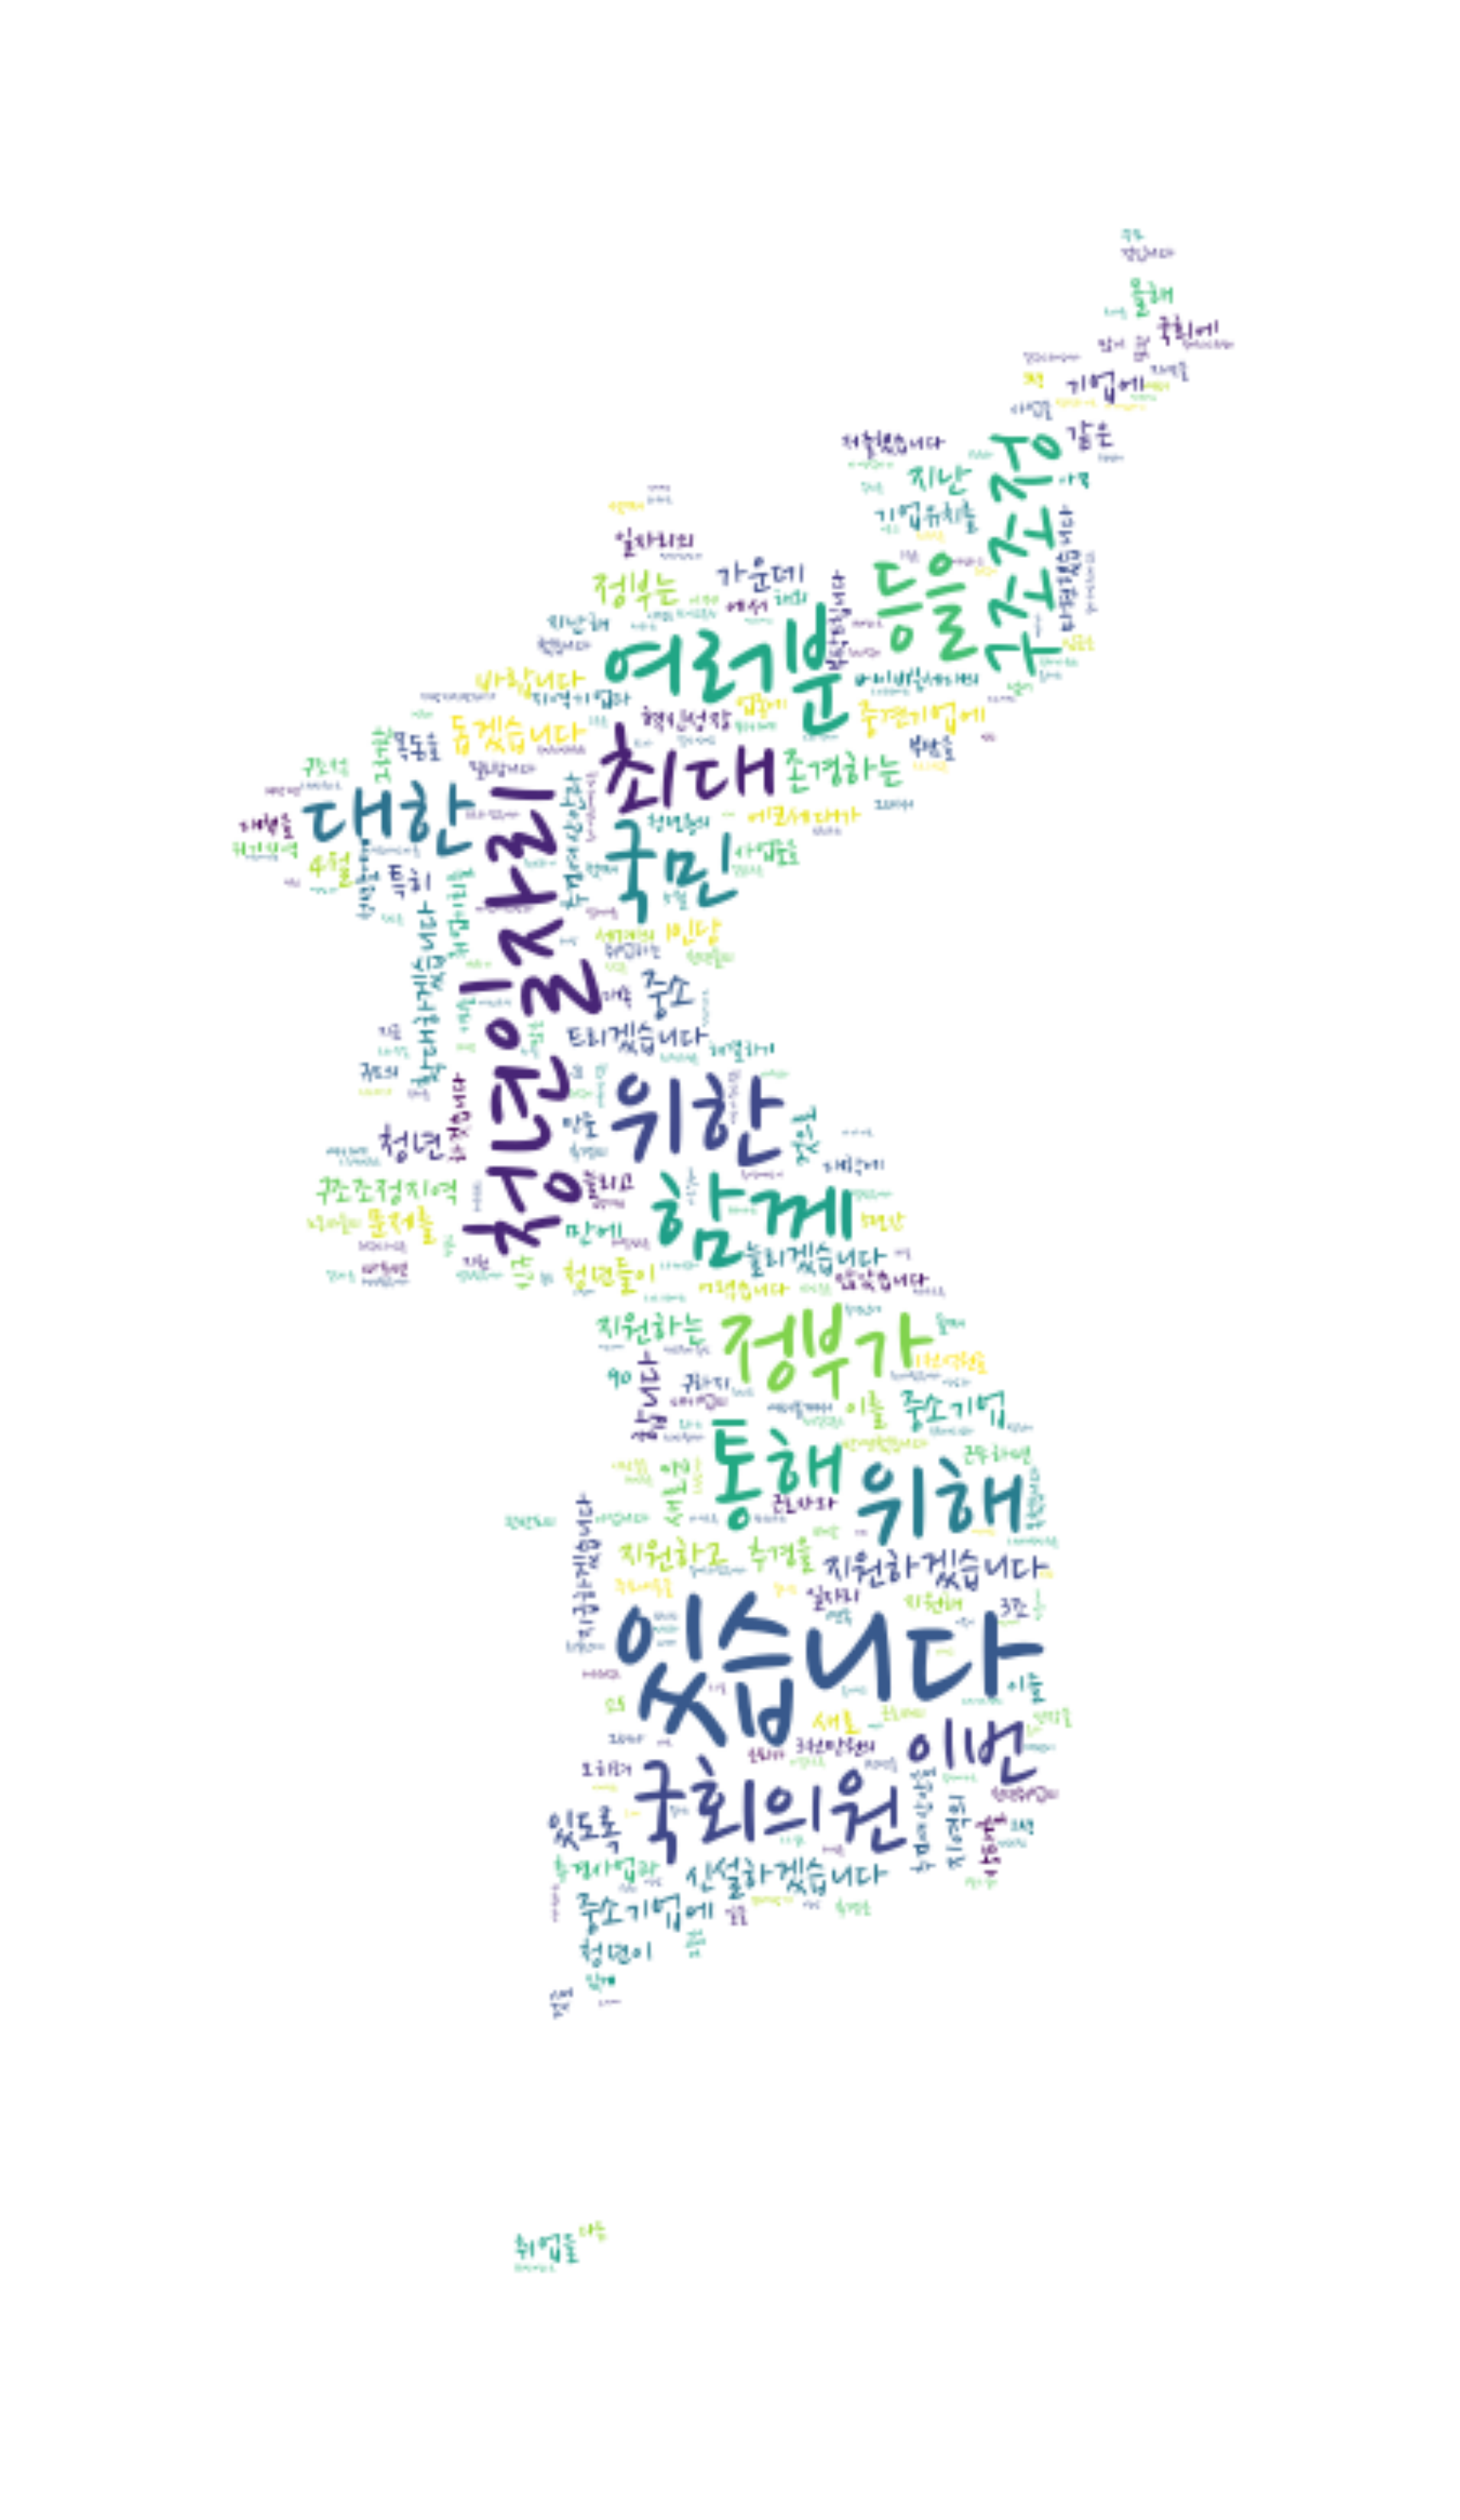

In [12]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("MoonSpeech.png") # 그림파일로 추출하기

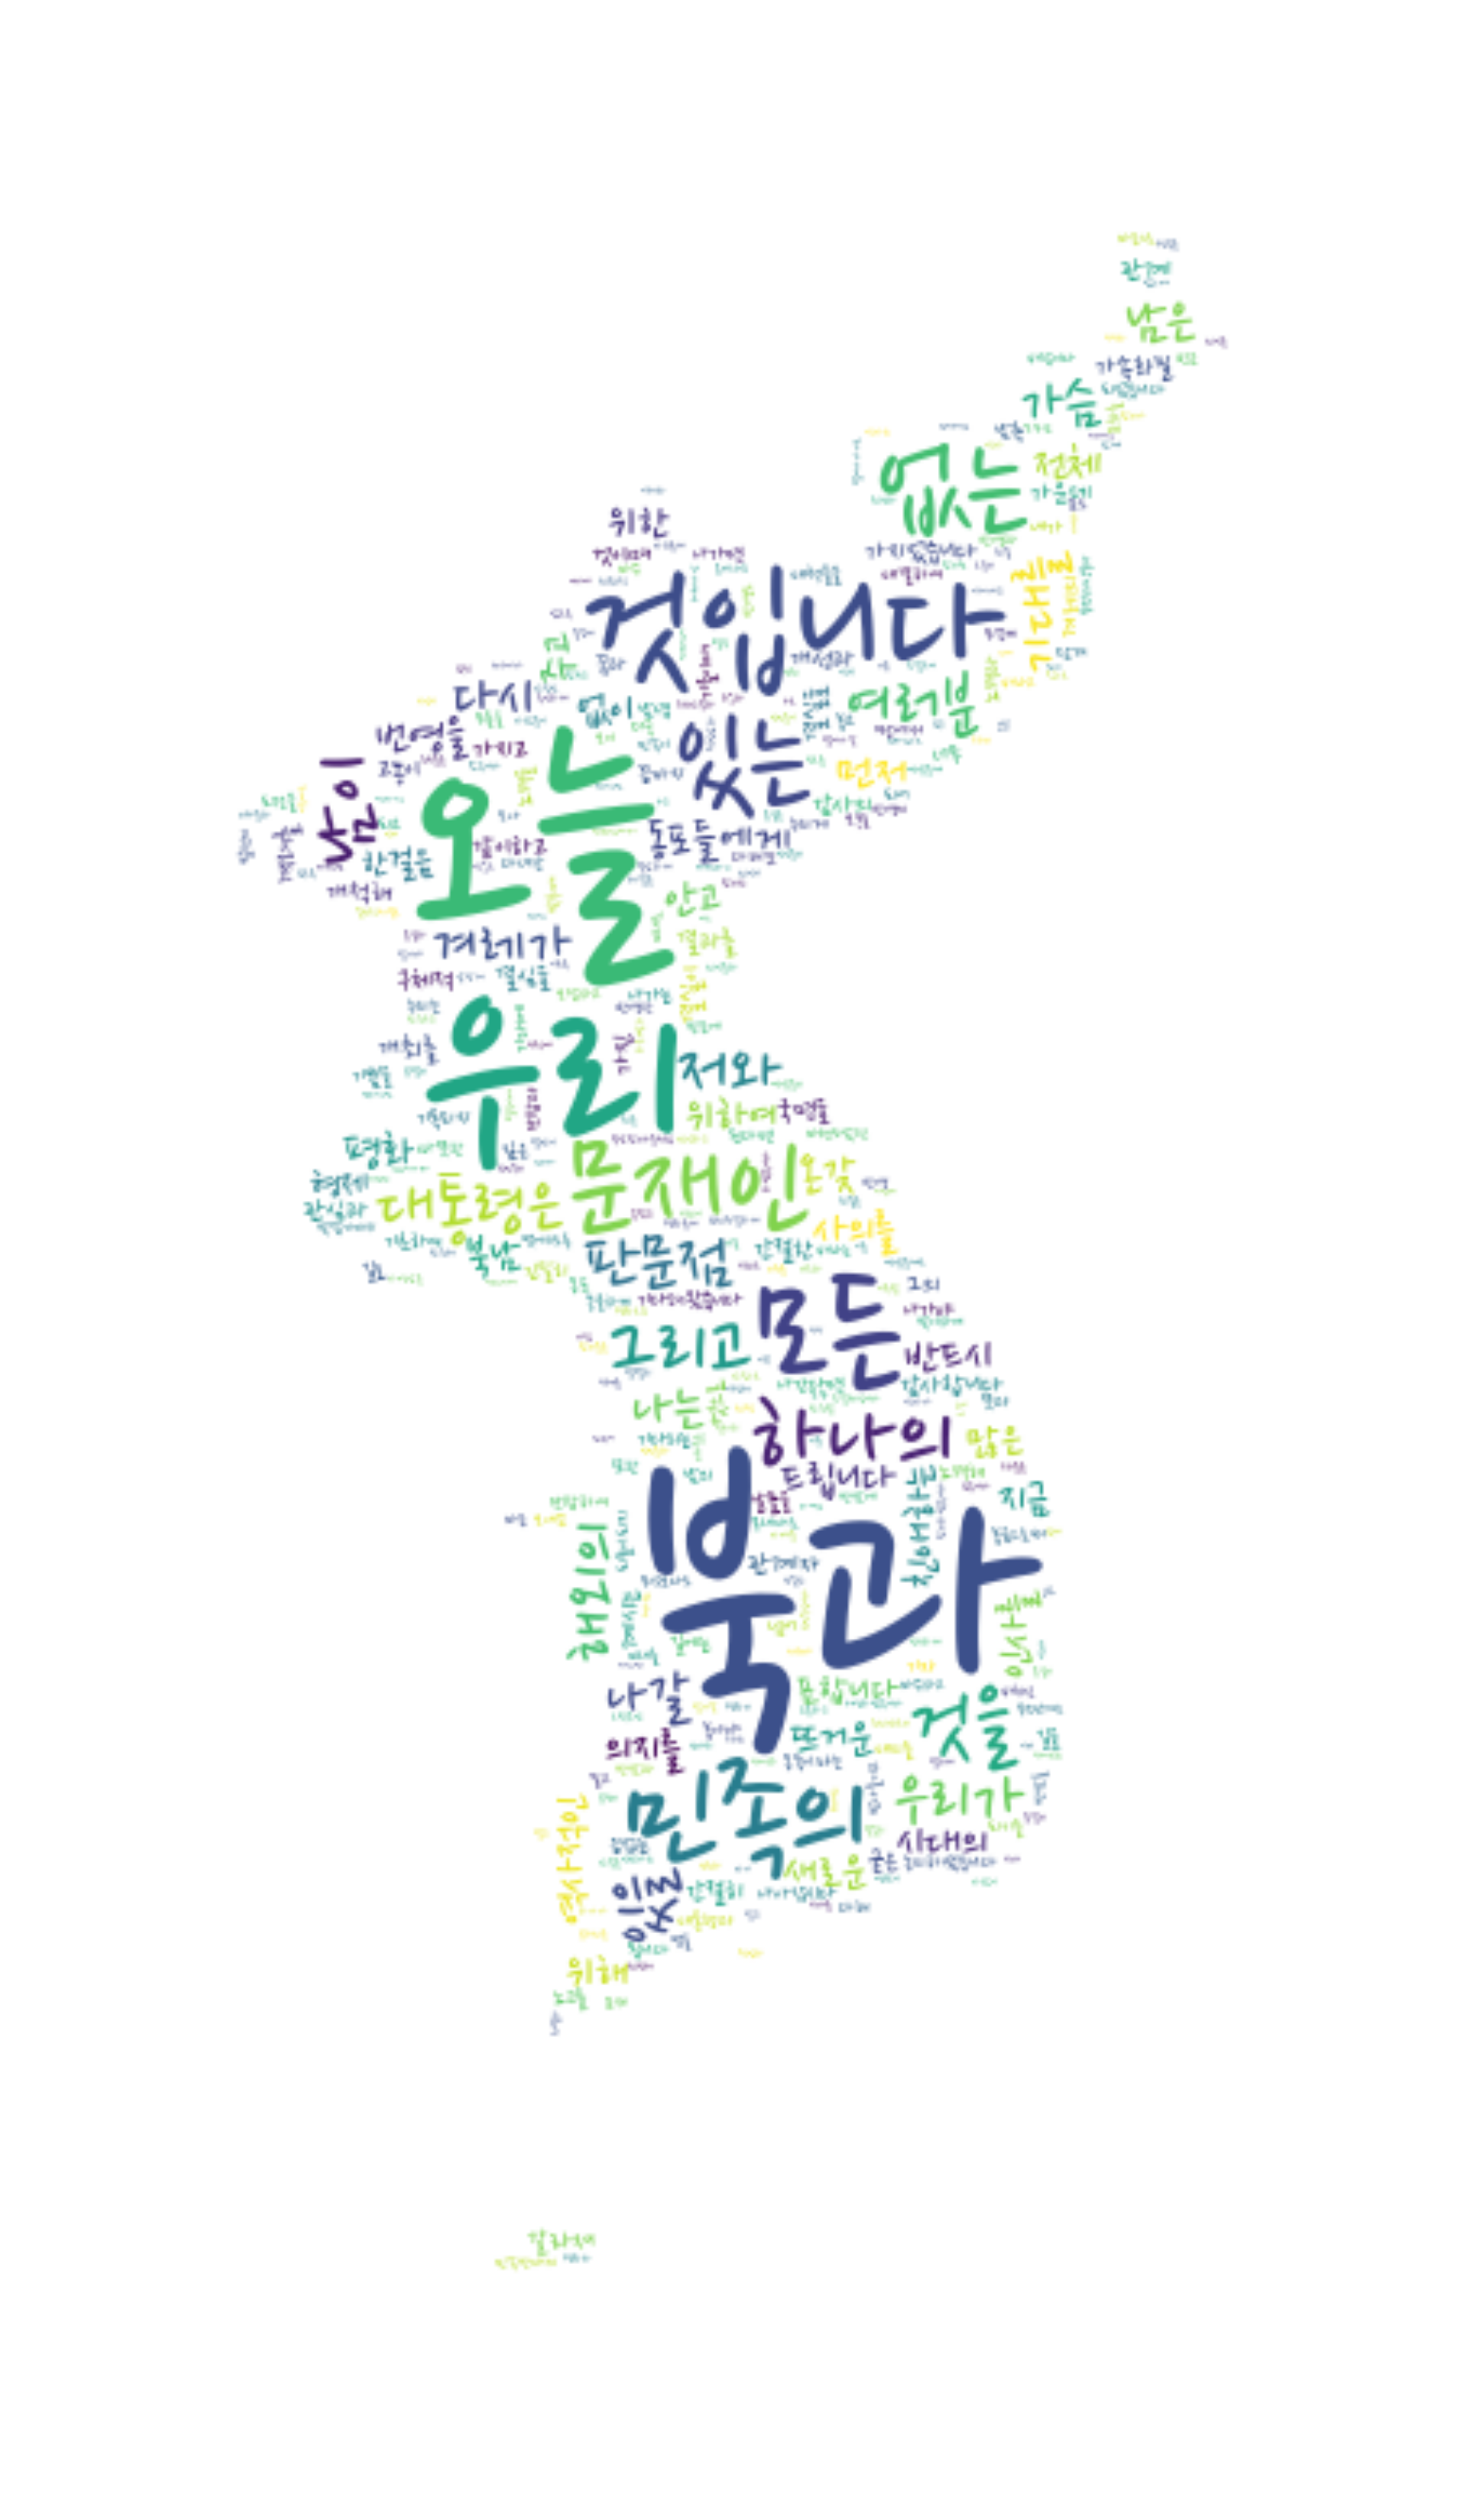

In [24]:
# 연설문 2
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict2)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("KimSpeech.png") # 그림파일로 추출하기